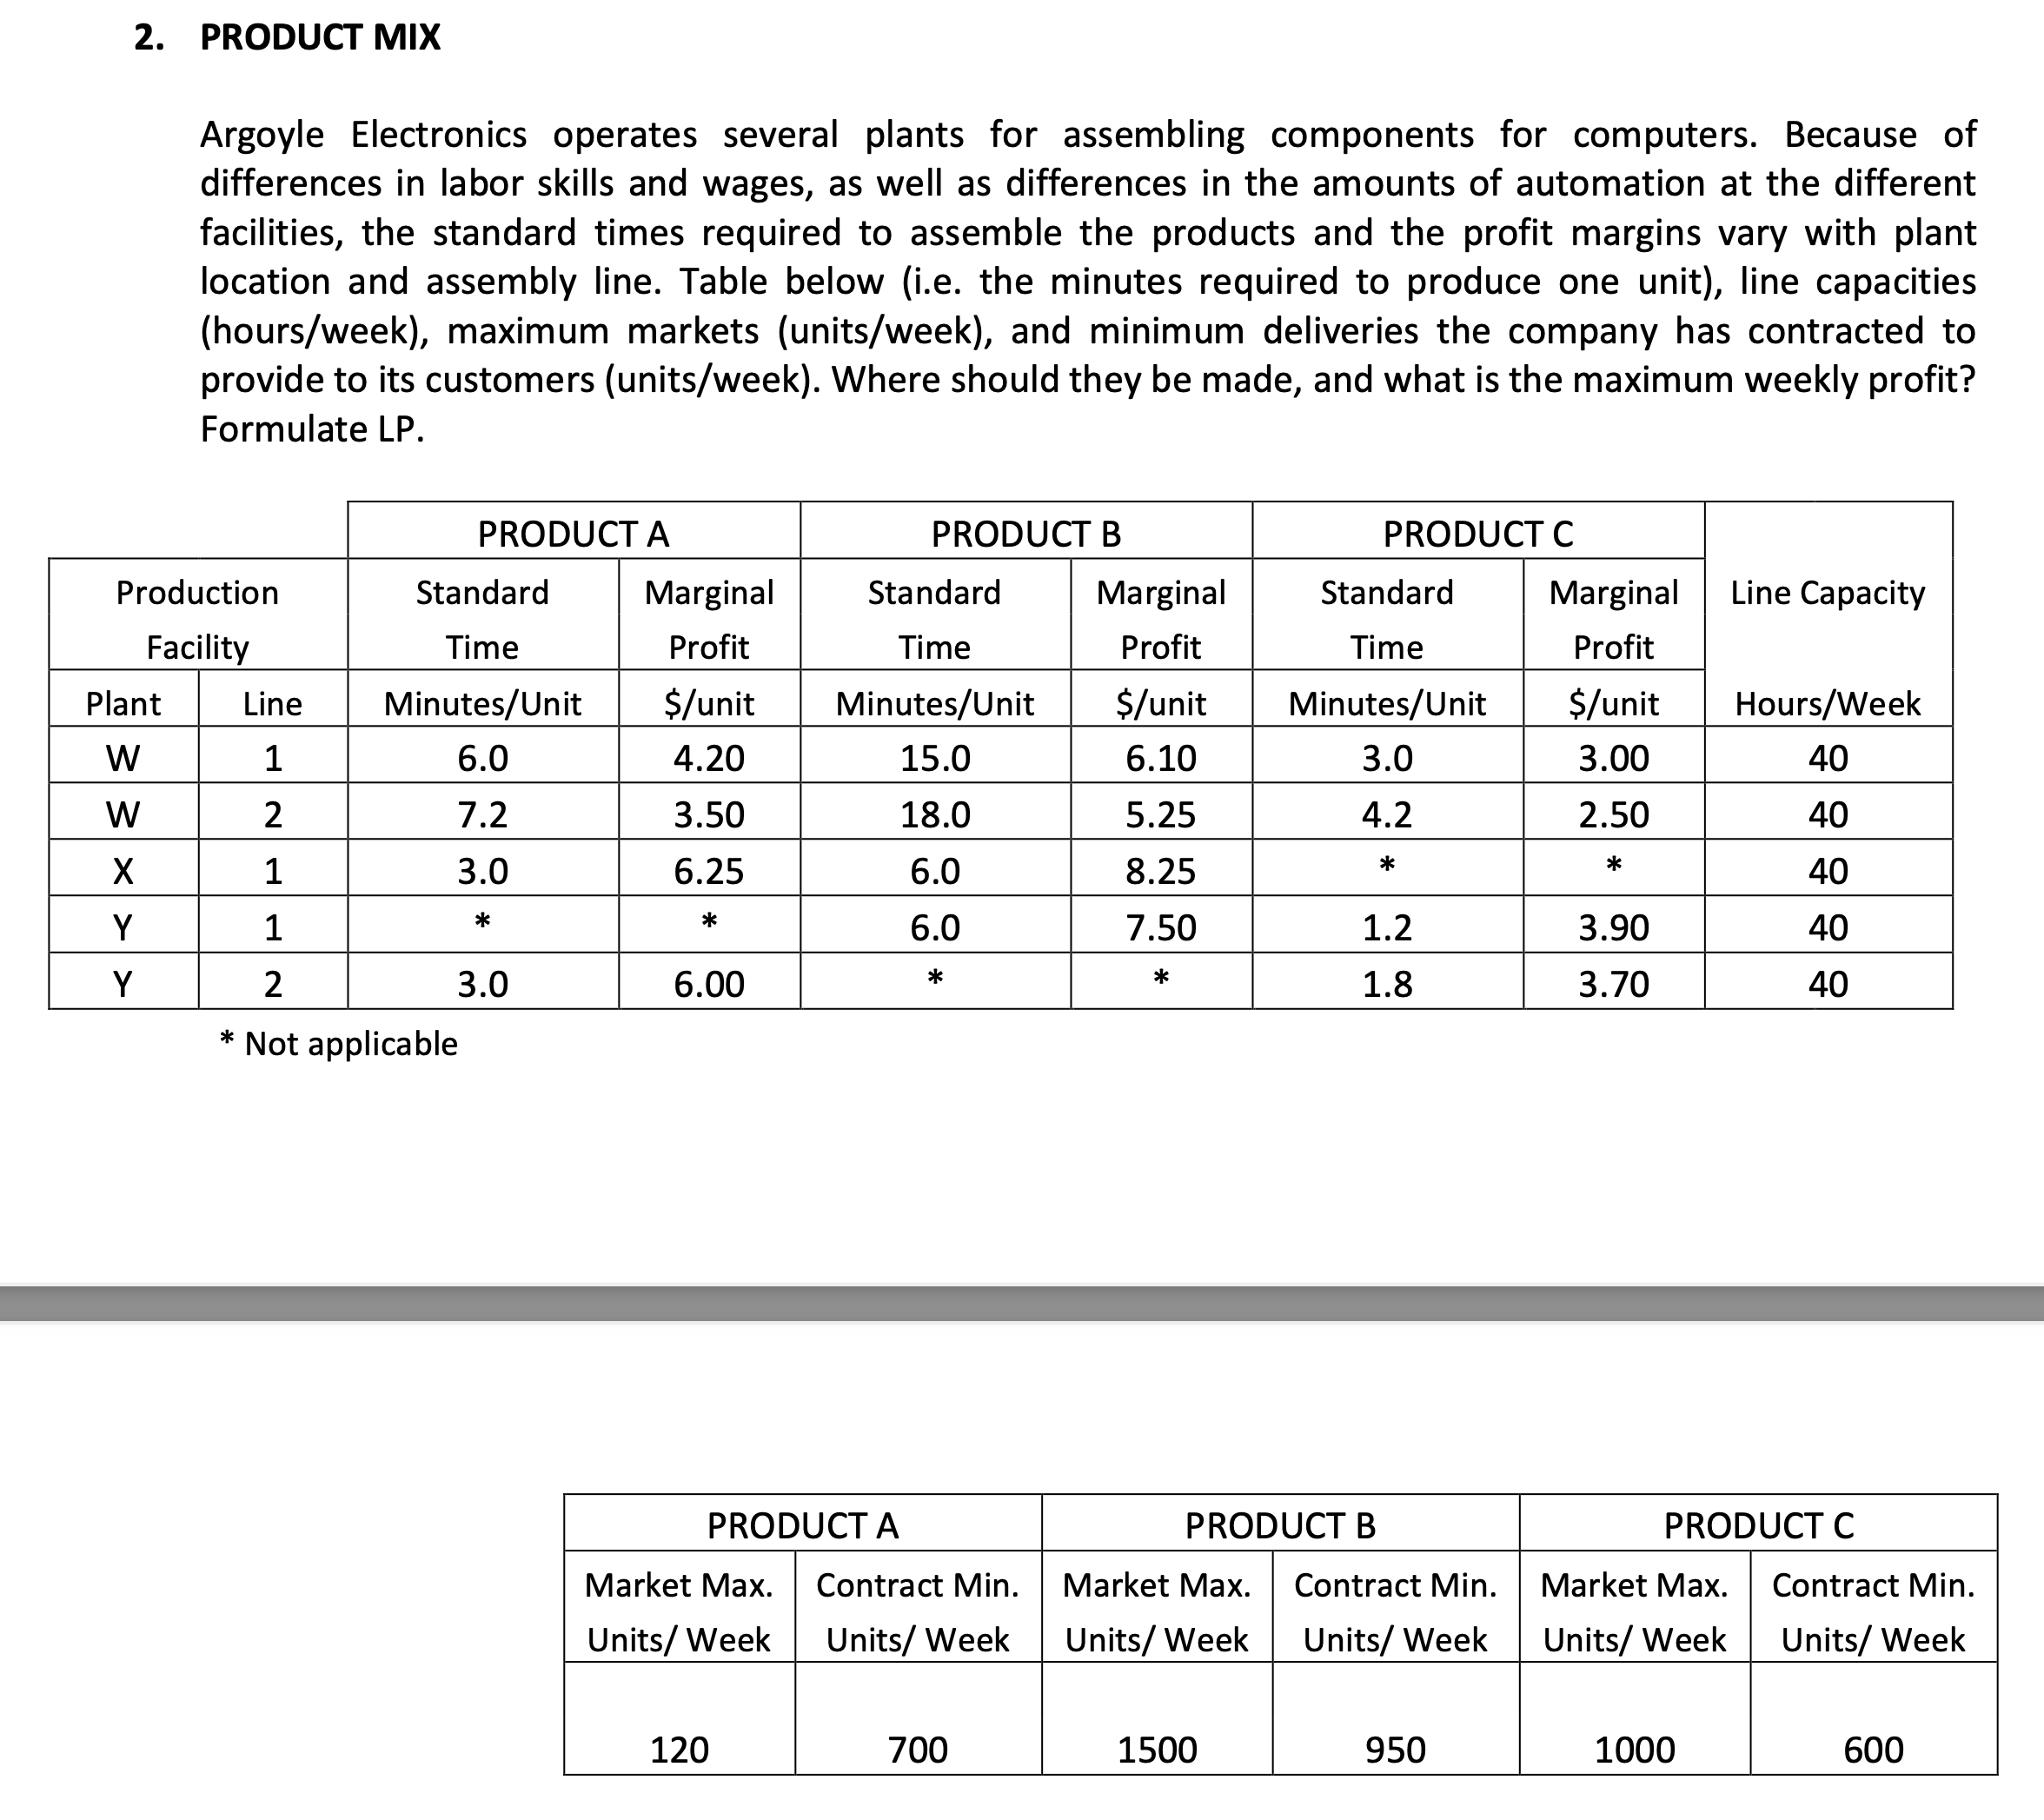

In [2]:
from pulp import *
import pandas as pd

In [20]:
# Initialize the LP
model = LpProblem('Product Mix', LpMaximize)

# Decision Variables
x = LpVariable.dicts('x', [1, 2, 3, 4, 5], lowBound=0, cat='Integer') # Plants W1, W2, X1, Y1, Y2

# Objective Function
model += 4.2 * x[1] + 6.1 * x[1] + 3 * x[1] + \
         3.5 * x[2] + 5.25 * x[2] + 2.5 * x[2] + \
         6.25 * x[3] + 8.25 * x[3] + \
         7.5 * x[4] + 3.90 * x[4] + \
         6.0 * x[5] + 3.7 * x[5]

# Add Constraints
model += (6 + 15 + 3) * x[1] <= 40 * 60, "Plant W Line 1"
model += (7.2 + 18 + 4.2) * x[2] <= 40 * 60, "Plant W Line 2"
model += (3 + 6) * x[3] <= 40 * 60, "Plant X Line 1"
model += (6 + 1.2) * x[4] <= 40 * 60, "Plant Y Line 1"
model += (3 + 1.8) * x[5] <= 40 * 60, "Plant Y Line 2"
# model += 6 * x[1] + 7.2 * x[2] + 3 * x[3] + 3 * x[5] <= 120, "Product A Market Max"
model += 15 * x[1] + 18 * x[2] + 6 * x[3] + 6 * x[4] <= 1500, "Product B Market Max"
model += 3 * x[1] + 4.2 * x[2] + 1.2 * x[4] + 1.8 * x[5] <= 1000, "Product C Market Max"
model += 6 * x[1] + 7.2 * x[2] + 3 * x[3] + 3 * x[5] >= 700, "Product A Contract Min"
model += 15 * x[1] + 18 * x[2] + 6 * x[3] + 6 * x[4] >= 950, "Product B Contract Min"
model += 3 * x[1] + 4.2 * x[2] + 1.2 * x[4] + 1.8 * x[5] >= 600, "Product C Contract Min"

print(model)

# Solve the modellem
status = model.solve()
print(LpStatus[status])

# Display variables
for var in model.variables():
    print(f"{var.name} = {var.varValue}")

# Display objective
max_profit = value(model.objective)
print(f"max profit = {max_profit}")

/Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Product_Mix:
MAXIMIZE
13.3*x_1 + 11.25*x_2 + 14.5*x_3 + 11.4*x_4 + 9.7*x_5 + 0.0
SUBJECT TO
Plant_W_Line_1: 24 x_1 <= 2400

Plant_W_Line_2: 29.4 x_2 <= 2400

Plant_X_Line_1: 9 x_3 <= 2400

Plant_Y_Line_1: 7.2 x_4 <= 2400

Plant_Y_Line_2: 4.8 x_5 <= 2400

Product_B_Market_Max: 15 x_1 + 18 x_2 + 6 x_3 + 6 x_4 <= 1500

Product_C_Market_Max: 3 x_1 + 4.2 x_2 + 1.2 x_4 + 1.8 x_5 <= 1000

Product_A_Contract_Min: 6 x_1 + 7.2 x_2 + 3 x_3 + 3 x_5 >= 700

Product_B_Contract_Min: 15 x_1 + 18 x_2 + 6 x_3 + 6 x_4 >= 950

Product_C_Contract_Min: 3 x_1 + 4.2 x_2 + 1.2 x_4 + 1.8 x_5 >= 600

VARIABLES
0 <= x_1 Integer
0 <= x_2 Integer
0 <= x_3 Integer
0 <= x_4 Integer
0 <= x_5 Integer

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/50c422b015024237a0e558043a9d7bca-pulp.mps -max -timeMode elapsed

In [15]:
# Initialize the LP
model = LpProblem('Product Mix', LpMaximize)

# Decision Variables
x = LpVariable.dicts('x', [1, 2, 3], lowBound=0, cat='Integer') # Products A, B, C

# Objective Function
model += 4.2 * x[1] + 6.1 * x[2] + 3 * x[3] + \
         3.5 * x[1] + 5.25 * x[2] + 2.5 * x[3] + \
         6.25 * x[1] + 8.25 * x[2] + \
         7.5 * x[2] + 3.90 * x[3] + \
         6.0 * x[1] + 3.7 * x[3]

# Add Constraints
model += 6 * x[1] + 15 * x[2] + 3 * x[3] <= 40 * 60, "Plant W Line 1"
model += 7.2 +x[1] + 18 * x[2] + 4.2 * x[3] <= 40 * 60, "Plant W Line 2"
model += 3 * x[1] + 6 * x[2] <= 40 * 60, "Plant X Line 1"
model += 6 * x[2] + 1.2 * x[3] <= 40 * 60, "Plant Y Line 1"
model += 3 * x[1] + 1.8 * x[3] <= 40 * 60, "Plant Y Line 2"
model += x[1] <= 120, "Product A Market Max"
model += x[2] <= 1500, "Product B Market Max"
model += x[3] <= 1000, "Product C Market Max"
model += x[1] >= 700, "Product A Contract Min"
model += x[2] >= 950, "Product B Contract Min"
model += x[3] >= 600, "Product C Contract Min"

print(model)

# Solve the modellem
status = model.solve()
print(LpStatus[status])

# Display variables
for var in model.variables():
    print(f"{var.name} = {var.varValue}")

# Display objective
max_profit = value(model.objective)
print(f"max profit = {max_profit}")

Product_Mix:
MAXIMIZE
19.95*x_1 + 27.1*x_2 + 13.100000000000001*x_3 + 0.0
SUBJECT TO
Plant_W_Line_1: 6 x_1 + 15 x_2 + 3 x_3 <= 2400

Plant_W_Line_2: x_1 + 18 x_2 + 4.2 x_3 <= 2392.8

Plant_X_Line_1: 3 x_1 + 6 x_2 <= 2400

Plant_Y_Line_1: 6 x_2 + 1.2 x_3 <= 2400

Plant_Y_Line_2: 3 x_1 + 1.8 x_3 <= 2400

Product_A_Market_Max: x_1 <= 120

Product_B_Market_Max: x_2 <= 1500

Product_C_Market_Max: x_3 <= 1000

Product_A_Contract_Min: x_1 >= 700

Product_B_Contract_Min: x_2 >= 950

Product_C_Contract_Min: x_3 >= 600

VARIABLES
0 <= x_1 Integer
0 <= x_2 Integer
0 <= x_3 Integer

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/1b66ad4b01254fe09422f4a460dba2b1-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/1b66ad4b01